# **Multi-Touch Attribution (MTA) Analysis for Budget Allocation and Optimizing Digital Marketing Strategies**

### **Introduction Overview**

In today's complex digital landscape, consumers interact with multiple marketing channels before making a purchase. Understanding the contribution of each channel is crucial for optimizing marketing strategies and budget allocation.

This project employs various attribution models—First Touch, Last Touch, Exponential Touch, and data-driven approaches using Markov Chains and Shapley Values—to analyze and enhance the effectiveness of different marketing channels. By leveraging these insights, businesses can make data-driven decisions to improve campaign performance, increase ROI, and enhance customer engagement.


### **Dataset Variables:**

*   **journey_id:** Each row represents a touchpoint in a customer's journey.
*   **user_id:** Unique identifier for users, allowing for multiple journeys per user.
*   **timestamp:** Randomly generated timestamps to simulate interactions over time.
*   **channel:** Marketing channels through which the interaction occurred.
*   **conversion:** Indicator of whether the journey resulted in a purchase.
*   **revenue:** Amount of revenue generated from the conversion.
*   **device:** Device used by the user during the interaction.
*   **location:** User's geographical location.
*   **session_duration:** Duration of the user's session.
*   **product_viewed:** Product viewed during the session.

### **Load the Data**

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('MTA_dataset.csv')

# Display the first few rows of the dataset
df.head()


,journey_id,user_id,timestamp,channel,conversion,revenue,device,location,session_duration,product_viewed
0,1,328,2024-05-23 12:26:01.427101,Social Media,0,0.000000,Desktop,California,62,Smartwatch
1,2,45,2024-06-13 14:29:12.427139,Social Media,1,64.302206,Tablet,Illinois,23,Smartwatch
2,2,45,2024-06-08 22:47:08.427153,Affiliate,1,64.302206,Tablet,Florida,122,Headphones
3,2,45,2024-05-28 12:19:06.427166,Email,1,64.302206,Desktop,Florida,184,Tablet
4,2,45,2024-06-11 14:36:28.427178,Paid Search,1,64.302206,Desktop,New York,204,Laptop


### **Exploratory Analysis**

In [64]:
# Summary statistics
summary = df.describe(include='all')
summary


,journey_id,user_id,timestamp,channel,conversion,revenue,device,location,session_duration,product_viewed
count,2935.000000,2935.000000,2935,2935,2935.000000,2935.000000,2935,2935,2935.000000,2935
unique,NaN,NaN,2935,6,NaN,NaN,3,5,NaN,5
top,NaN,NaN,2024-05-23 12:26:01.427101,Affiliate,NaN,NaN,Desktop,New York,NaN,Smartphone
freq,NaN,NaN,1,503,NaN,NaN,997,612,NaN,624
mean,496.163543,253.862351,NaN,NaN,0.509370,137.809331,NaN,NaN,156.057240,NaN
std,286.523913,145.454662,NaN,NaN,0.499997,164.794746,NaN,NaN,83.832209,NaN
min,1.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,10.000000,NaN
25%,249.000000,122.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,82.000000,NaN
50%,497.000000,264.000000,NaN,NaN,1.000000,60.862931,NaN,NaN,156.000000,NaN
75%,743.000000,375.000000,NaN,NaN,1.000000,268.745432,NaN,NaN,227.000000,NaN


#### **Distribution of Marketing Channels**

By analyzing the distribution and conversion rates of different marketing channels, we can identify which channels are most effective in driving conversions. For instance, if "Paid Search" has a high conversion rate, we might consider allocating more budget to this channel.

<ipython-input-69-a60225f1cb4d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='channel', order=channel_distribution.index, palette='Blues_d')


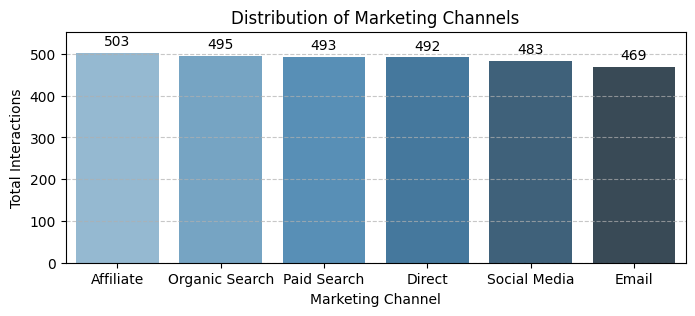

In [69]:
# Distribution of marketing channels
channel_distribution = df['channel'].value_counts()
#channel_distribution

# Plot distribution of marketing channels
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='channel', order=channel_distribution.index, palette='Blues_d')
plt.title('Distribution of Marketing Channels', fontsize=12)
plt.xlabel('Marketing Channel', fontsize=10)
plt.ylabel('Total Interactions', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
for i, count in enumerate(channel_distribution.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(channel_distribution.values) + 50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### **Conversion Rate by Channel**

<ipython-input-72-b93b40bc40f6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_by_channel.index, y=conversion_rate_by_channel.values, palette='Blues_d')


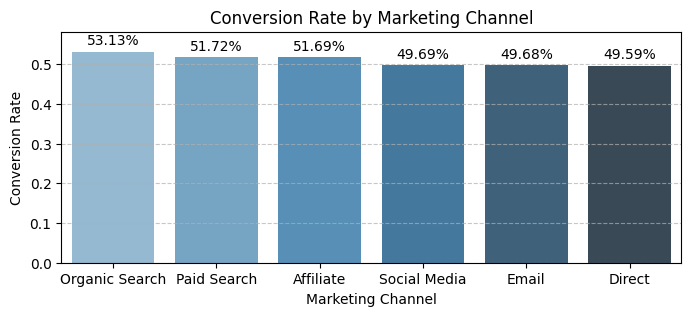

In [72]:
# Conversion rate by channel
conversion_rate_by_channel = df.groupby('channel')['conversion'].mean().sort_values(ascending=False)
#print(conversion_rate_by_channel)

# Plot conversion rate by channel
plt.figure(figsize=(8, 3))
sns.barplot(x=conversion_rate_by_channel.index, y=conversion_rate_by_channel.values, palette='Blues_d')
plt.title('Conversion Rate by Marketing Channel', fontsize=12)
plt.xlabel('Marketing Channel', fontsize=10)
plt.ylabel('Conversion Rate', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
for i, rate in enumerate(conversion_rate_by_channel.values):
    plt.text(i, rate + 0.01, f"{rate:.2%}", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(conversion_rate_by_channel.values) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### **Average Revenue by Channel**

Understanding the average revenue generated by each channel helps in evaluating the ROI of marketing efforts. Channels with high average revenue but lower conversion rates might still be valuable due to the higher transaction value.

<ipython-input-77-cfb8452fdf4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_revenue_by_channel.index, y=average_revenue_by_channel.values, palette='Blues_d')


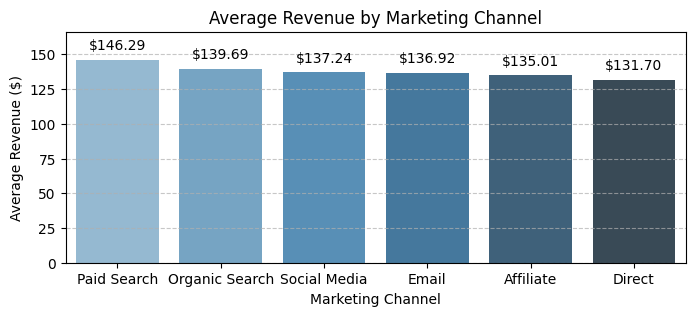

In [77]:
# Average revenue by channel
average_revenue_by_channel = df.groupby('channel')['revenue'].mean().sort_values(ascending=False)
#print(average_revenue_by_channel)

# Plot average revenue by channel
plt.figure(figsize=(8, 3))
sns.barplot(x=average_revenue_by_channel.index, y=average_revenue_by_channel.values, palette='Blues_d')
plt.title('Average Revenue by Marketing Channel', fontsize=12)
plt.xlabel('Marketing Channel', fontsize=10)
plt.ylabel('Average Revenue ($)', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
for i, revenue in enumerate(average_revenue_by_channel.values):
    plt.text(i, revenue + 5, f"${revenue:.2f}", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(average_revenue_by_channel.values) + 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### **Session Duration Analysis**

Examining the distribution of session durations provides insights into user engagement. Longer sessions might indicate more engaged users who are closer to making a purchase. Shorter sessions might require strategies to increase user engagement.

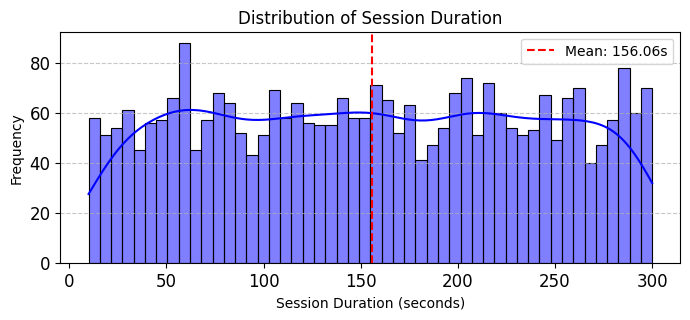

In [78]:
# Distribution of session duration
plt.figure(figsize=(8, 3))
sns.histplot(df['session_duration'], bins=50, kde=True, color='blue')
plt.title('Distribution of Session Duration', fontsize=12)
plt.xlabel('Session Duration (seconds)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(df['session_duration'].mean(), color='red', linestyle='--', label=f"Mean: {df['session_duration'].mean():.2f}s")
plt.legend(fontsize=10)
plt.show()


#### **Conversion Rate by Device**

Analyzing conversion rates by device can inform device-specific marketing strategies. For example, if mobile users have a higher conversion rate, optimizing mobile user experience and targeting mobile-specific ads could be beneficial.

<ipython-input-79-bfcfaebdd848>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_by_device.index, y=conversion_rate_by_device.values, palette='Blues_d')


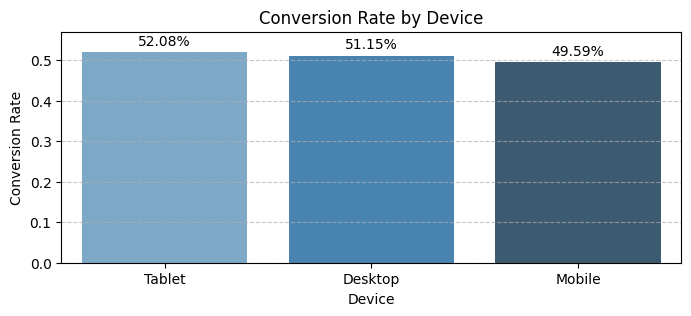

In [79]:
# Conversion rate by device
conversion_rate_by_device = df.groupby('device')['conversion'].mean().sort_values(ascending=False)
#print(conversion_rate_by_device)

# Plot conversion rate by device
plt.figure(figsize=(8, 3))
sns.barplot(x=conversion_rate_by_device.index, y=conversion_rate_by_device.values, palette='Blues_d')
plt.title('Conversion Rate by Device', fontsize=12)
plt.xlabel('Device', fontsize=10)
plt.ylabel('Conversion Rate', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i, rate in enumerate(conversion_rate_by_device.values):
    plt.text(i, rate + 0.01, f"{rate:.2%}", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(conversion_rate_by_device.values) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### **Time of Day Analysis for Ad Engagement and Conversions**

This plot helps in understanding the time of day when users are most actively engaging with ads and converting. It shows the interaction and conversion counts by the hour of the day, with vertical lines indicating the peak interaction and conversion hours. This information can help optimize the timing of ad placements for maximum effectiveness.

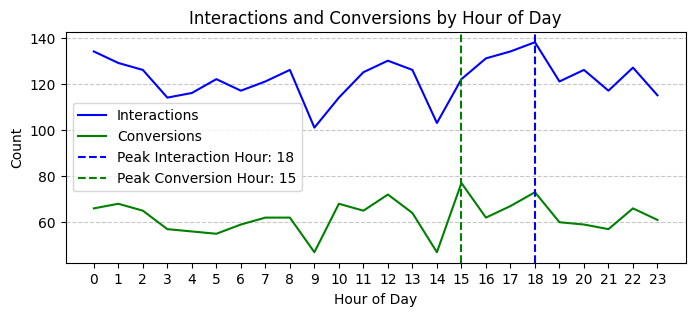

In [80]:
# Convert timestamp to datetime and extract hour
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour_of_day'] = df['timestamp'].dt.hour

# Interaction counts by hour
interactions_by_hour = df['hour_of_day'].value_counts().sort_index()
# Conversion counts by hour
conversions_by_hour = df[df['conversion'] == 1]['hour_of_day'].value_counts().sort_index()

# Plot interaction counts by hour
plt.figure(figsize=(8, 3))
sns.lineplot(x=interactions_by_hour.index, y=interactions_by_hour.values, label='Interactions', color='blue')
sns.lineplot(x=conversions_by_hour.index, y=conversions_by_hour.values, label='Conversions', color='green')
plt.title('Interactions and Conversions by Hour of Day', fontsize=12)
plt.xlabel('Hour of Day', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(interactions_by_hour.idxmax(), color='blue', linestyle='--', label=f'Peak Interaction Hour: {interactions_by_hour.idxmax()}')
plt.axvline(conversions_by_hour.idxmax(), color='green', linestyle='--', label=f'Peak Conversion Hour: {conversions_by_hour.idxmax()}')
plt.legend()
plt.show()


#### **Customer Journey Analysis**

These plots provide insights into customer journeys by analyzing the average number of touchpoints before a conversion and identifying the most common paths to conversion. The first plot shows the distribution of touchpoints required for a conversion, highlighting the average number. The second plot showcases the top 10 most frequent paths to conversion, providing valuable information for optimizing the customer journey.

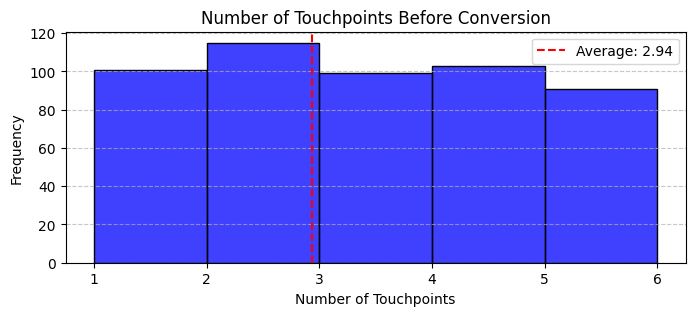

<ipython-input-81-96aa1d98606e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=common_paths.index, x=common_paths.values, palette='Blues_d')


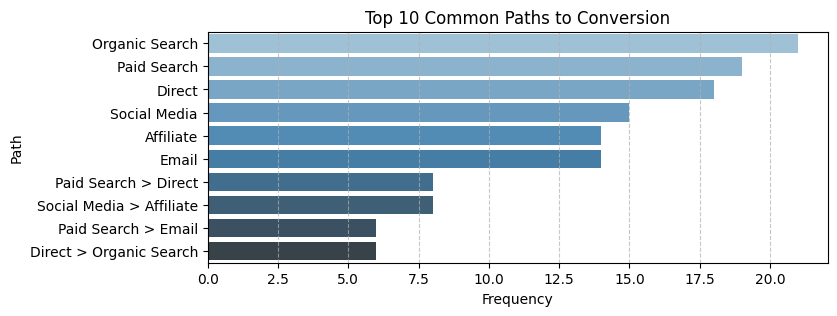

In [81]:
# Number of touchpoints before conversion
df['is_conversion'] = df.groupby('journey_id')['conversion'].transform('max')
journey_lengths = df[df['is_conversion'] == 1].groupby('journey_id').size()

# Common paths
common_paths = df[df['is_conversion'] == 1].groupby('journey_id')['channel'].apply(lambda x: ' > '.join(x)).value_counts().head(10)

# Plot average number of touchpoints before conversion
plt.figure(figsize=(8, 3))
sns.histplot(journey_lengths, bins=range(1, journey_lengths.max() + 2), color='blue')
plt.title('Number of Touchpoints Before Conversion', fontsize=12)
plt.xlabel('Number of Touchpoints', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(journey_lengths.mean(), color='red', linestyle='--', label=f'Average: {journey_lengths.mean():.2f}')
plt.legend()
plt.show()

# Plot common paths to conversion
plt.figure(figsize=(8, 3))
sns.barplot(y=common_paths.index, x=common_paths.values, palette='Blues_d')
plt.title('Top 10 Common Paths to Conversion', fontsize=12)
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('Path', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### **Attribution Modeling**

We will perform 4 major attribution modeling:

*   First Touch Attribution
*   last Touch Attribution
*   Exponential Touch Attribution (Radioactive Touch)
*   Data-Driven Attribution
 * using Markov Chains
 * using Shapely values




#### **First Touch Attribution**

Attributes the entire conversion to the first interaction channel. Useful for understanding which channels are effective in initiating customer journeys.

In [83]:
from collections import defaultdict

def first_touch_attribution(df):
    attribution = defaultdict(int)
    for journey in df.groupby('journey_id'):
        first_touch = journey[1]['channel'].iloc[0]
        attribution[first_touch] += 1
    return attribution

ft_attribution = first_touch_attribution(df)
ft_attribution = pd.DataFrame.from_dict(ft_attribution, orient='index', columns=['Conversions'])
ft_attribution['Percentage'] = (ft_attribution['Conversions'] / ft_attribution['Conversions'].sum()) * 100
ft_attribution = ft_attribution.sort_values(by='Conversions', ascending=False)
ft_attribution


,Conversions,Percentage
Paid Search,176,17.6
Social Media,172,17.2
Direct,172,17.2
Affiliate,170,17.0
Organic Search,159,15.9
Email,151,15.1


#### **Last Touch Attribution**

Attributes the entire conversion to the last interaction channel. Useful for understanding which channels are effective in closing conversions.


In [84]:
def last_touch_attribution(df):
    attribution = defaultdict(int)
    for journey in df.groupby('journey_id'):
        last_touch = journey[1]['channel'].iloc[-1]
        attribution[last_touch] += 1
    return attribution

lt_attribution = last_touch_attribution(df)
lt_attribution = pd.DataFrame.from_dict(lt_attribution, orient='index', columns=['Conversions'])
lt_attribution['Percentage'] = (lt_attribution['Conversions'] / lt_attribution['Conversions'].sum()) * 100
lt_attribution = lt_attribution.sort_values(by='Conversions', ascending=False)
lt_attribution


,Conversions,Percentage
Social Media,173,17.3
Affiliate,172,17.2
Organic Search,166,16.6
Paid Search,166,16.6
Direct,164,16.4
Email,159,15.9


#### **Exponential Touch Attribution (Radioactive Touch)**

Assigns more credit to interactions closer to the conversion event, using an exponential decay factor. Balances the importance of all interactions, with more weight given to recent ones.


In [85]:
def radioactive_touch_attribution(df, decay_factor=0.5):
    attribution = defaultdict(float)
    for journey in df.groupby('journey_id'):
        events = journey[1]
        num_events = len(events)
        for i, touchpoint in enumerate(events['channel']):
            attribution[touchpoint] += decay_factor ** (num_events - i - 1)
    return attribution

rt_attribution = radioactive_touch_attribution(df)
rt_attribution = pd.DataFrame.from_dict(rt_attribution, orient='index', columns=['Conversions'])
rt_attribution['Percentage'] = (rt_attribution['Conversions'] / rt_attribution['Conversions'].sum()) * 100
rt_attribution = rt_attribution.sort_values(by='Conversions', ascending=False)
rt_attribution


,Conversions,Percentage
Affiliate,272.3750,16.991578
Direct,268.9375,16.777137
Organic Search,267.8125,16.706956
Social Media,267.7500,16.703057
Paid Search,267.5000,16.687461
Email,258.6250,16.133812


#### **Data-Driven Attribution using Markov Chains**

Uses transition probabilities between channels to assess the impact of removing a channel from the customer journey. Provides a data-driven perspective on each channel's contribution.

In [86]:
import numpy as np

def markov_chain_attribution(df):
    transition_counts = defaultdict(lambda: defaultdict(int))
    for journey in df.groupby('journey_id'):
        events = journey[1]
        for i in range(len(events) - 1):
            transition_counts[events['channel'].iloc[i]][events['channel'].iloc[i + 1]] += 1

    transition_matrix = {key: {k: v / float(sum(value.values())) for k, v in value.items()} for key, value in transition_counts.items()}

    removal_effects = defaultdict(float)
    for touchpoint in transition_matrix:
        for next_touchpoint, prob in transition_matrix[touchpoint].items():
            removal_effects[next_touchpoint] += prob * (1 - prob)
    total_effect = sum(removal_effects.values())
    for key in removal_effects:
        removal_effects[key] /= total_effect

    return removal_effects

mc_attribution = markov_chain_attribution(df)
mc_attribution = pd.DataFrame.from_dict(mc_attribution, orient='index', columns=['Conversions'])
mc_attribution['Percentage'] = (mc_attribution['Conversions'] / mc_attribution['Conversions'].sum()) * 100
mc_attribution = mc_attribution.sort_values(by='Conversions', ascending=False)
mc_attribution


,Conversions,Percentage
Organic Search,0.172618,17.261806
Affiliate,0.171038,17.103780
Direct,0.165582,16.558217
Paid Search,0.164895,16.489500
Email,0.164549,16.454912
Social Media,0.161318,16.131784


#### **Data-Driven Attribution using Shapley Values**

Uses game theory to fairly distribute the credit of a conversion among all contributing channels. Considers the marginal contribution of each channel in all possible combinations of interactions.

In [87]:
from itertools import combinations

def shapley_values_attribution(df):
    touchpoints = set(tp for journey in df.groupby('journey_id')['channel'] for tp in journey[1])
    contributions = defaultdict(float)

    def marginal_contribution(touchpoint, coalition, df):
        total_with = sum(1 for journey in df.groupby('journey_id') if set(coalition + [touchpoint]).issubset(set(journey[1]['channel'])))
        total_without = sum(1 for journey in df.groupby('journey_id') if set(coalition).issubset(set(journey[1]['channel'])))
        return total_with - total_without

    for tp in touchpoints:
        for r in range(len(touchpoints)):
            for coalition in combinations(touchpoints - {tp}, r):
                contributions[tp] += marginal_contribution(tp, list(coalition), df) / len(touchpoints)

    total_contributions = sum(contributions.values())
    for key in contributions:
        contributions[key] /= total_contributions

    return contributions

sv_attribution = shapley_values_attribution(df)
sv_attribution = pd.DataFrame.from_dict(sv_attribution, orient='index', columns=['Conversions'])
sv_attribution['Percentage'] = (sv_attribution['Conversions'] / sv_attribution['Conversions'].sum()) * 100
sv_attribution = sv_attribution.sort_values(by='Conversions', ascending=False)
sv_attribution


,Conversions,Percentage
Email,0.174191,17.419089
Paid Search,0.171511,17.151103
Affiliate,0.166770,16.676974
Social Media,0.166254,16.625438
Direct,0.164090,16.408988
Organic Search,0.157184,15.718409


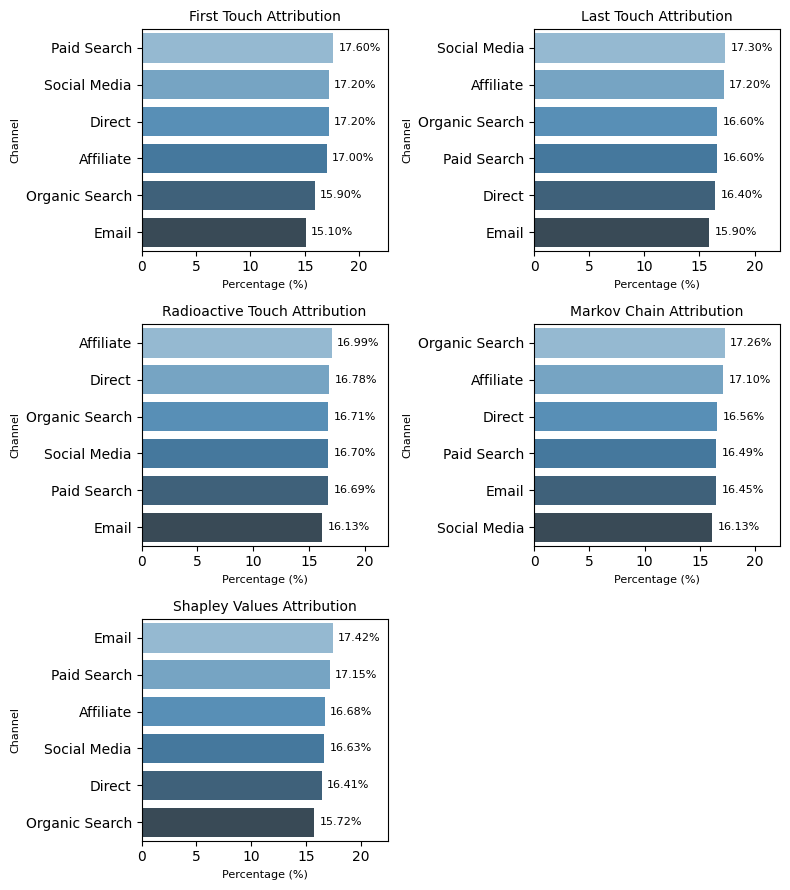

In [90]:
# Plotting each attribution model
plt.figure(figsize=(8, 9))
attributions = {
    'First Touch': ft_attribution,
    'Last Touch': lt_attribution,
    'Radioactive Touch': rt_attribution,
    'Markov Chain': mc_attribution,
    'Shapley Values': sv_attribution
}

for i, (model_name, model_data) in enumerate(attributions.items(), 1):
    plt.subplot(3, 2, i)
    sns.barplot(y=model_data.index, x=model_data['Percentage'], hue=model_data.index, palette='Blues_d', dodge=False, legend=False)
    plt.title(f'{model_name} Attribution', fontsize=10)
    plt.xlabel('Percentage (%)', fontsize=8)
    plt.ylabel('Channel', fontsize=8)
    plt.xlim(0, max(model_data['Percentage']) + 5)
    for j, (value, percentage) in enumerate(zip(model_data['Conversions'], model_data['Percentage'])):
        plt.text(percentage + 0.5, j, f'{percentage:.2f}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()


### **Use Cases:**

#### **Budget Reallocation:**

By understanding which channels are most effective in driving conversions (as indicated by higher percentages), businesses can allocate their marketing budget more efficiently. Here’s how:

*   **High First Touch Percentage:** If a channel has a high percentage in the first touch model, it is effective at attracting new prospects. Increase budget allocation to these channels to drive more top-of-funnel traffic.
*   **High Last Touch Percentage:** Channels with high last touch percentages are effective at closing sales. Allocate more budget to these channels to improve conversion rates.
*   **High Exponential Touch Percentage:** Channels that consistently contribute across the customer journey should be funded to maintain user engagement throughout the journey.
*   **High Data-Driven (Markov Chain and Shapley Values) Percentage:** These channels are critical at different points in the journey. Allocate budgets to these channels to ensure they continue to drive value and optimize the overall customer journey.







In [56]:
# Example reallocation based on Shapley Values attribution
budget_allocation = {
    'Email': 10000,
    'Social Media': 15000,
    'Paid Search': 20000,
    'Organic Search': 8000,
    'Direct': 5000,
    'Affiliate': 3000
}

# Calculate new budget based on Shapley Values percentages
total_budget = sum(budget_allocation.values())
shapley_values_percentage = sv_attribution['Percentage'] / 100
new_budget_allocation = shapley_values_percentage * total_budget
new_budget_allocation = new_budget_allocation.to_dict()

print("New Budget Allocation:")
new_budget_allocation


New Budget Allocation:


{'Email': 10625.644197072765,
 'Paid Search': 10462.172747887033,
 'Affiliate': 10172.95403009689,
 'Social Media': 10141.517212945784,
 'Direct': 10009.482580911157,
 'Organic Search': 9588.229231086376}

#### **Optimize Marketing Strategies:**


*   **Campaign Timing and Placement:** Use time-of-day analysis insights to run campaigns during peak interaction and conversion times, ensuring ads reach the audience when they are most likely to engage and convert.
*   **Channel-Specific Strategies:** Tailor your marketing strategies based on the strengths of each channel. For instance, use high-first-touch channels for awareness campaigns and high-last-touch channels for retargeting campaigns.





In [52]:
# Example: Optimizing campaign timing based on peak interaction and conversion hours
peak_interaction_hour = interactions_by_hour.idxmax()
peak_conversion_hour = conversions_by_hour.idxmax()

print(f"Schedule campaigns around {peak_interaction_hour} for maximum interactions.")
print(f"Schedule campaigns around {peak_conversion_hour} for maximum conversions.")


Schedule campaigns around 18 for maximum interactions.
Schedule campaigns around 15 for maximum conversions.


#### **A/B Test**

Set up and execute A/B tests to validate the insights gained from attribution models, specifically focusing on testing different budget allocations and measuring their impact on conversions.

**We'll create two groups for our A/B test:**


*   **Control Group:** Uses the initial budget allocation.
*   **Test Group:** Uses the new budget allocation based on Shapley Values.

**Steps:**

*   **Setup Initial Budget Allocations:** We define our initial budget allocations and calculate the total budget. We then use the Shapley Values attribution percentages to allocate the budget more effectively.
*   **Define A/B Test Groups:** We create two groups for the A/B test: a control group with the initial budget allocation and a test group with the new budget allocation.
*   **Simulate Campaign Performance:** We simulate campaign performance by generating a number of conversions based on the allocated budgets. This step helps us understand how each budget allocation impacts conversions.
*   **Compare Results:** We compare the total conversions between the control and test groups. The conversion lift indicates the percentage increase or decrease in conversions in the test group compared to the control group.



In [55]:
# Define A/B test groups
test_groups = {
    'Control': initial_budget_allocation,
    'Test': new_budget_allocation
}

print("A/B Test Groups:")
test_groups


A/B Test Groups:


{'Control': {'Email': 10000,
  'Social Media': 15000,
  'Paid Search': 20000,
  'Organic Search': 8000,
  'Direct': 5000,
  'Affiliate': 3000},
 'Test': {'Email': 10625.644197072765,
  'Paid Search': 10462.172747887033,
  'Affiliate': 10172.95403009689,
  'Social Media': 10141.517212945784,
  'Direct': 10009.482580911157,
  'Organic Search': 9588.229231086376}}

#### **Simulate Campaign Performance**

For the purpose of this example, we'll simulate campaign performance based on the allocated budgets. In a real-world scenario, you would run actual campaigns and collect performance data.

In [57]:
import numpy as np

# Function to simulate campaign performance
def simulate_performance(budget_allocation):
    np.random.seed(42)  # For reproducibility
    performance = {}
    for channel, budget in budget_allocation.items():
        # Simulate the number of conversions based on budget (assuming linear relationship with some randomness)
        conversions = np.random.poisson(lam=budget / 1000)
        performance[channel] = conversions
    return performance

# Simulate performance for both test groups
control_performance = simulate_performance(test_groups['Control'])
test_performance = simulate_performance(test_groups['Test'])

print("Control Group Performance:")
print(control_performance)
print("Test Group Performance:")
print(test_performance)


Control Group Performance:
{'Email': 12, 'Social Media': 10, 'Paid Search': 21, 'Organic Search': 5, 'Direct': 5, 'Affiliate': 2}
Test Group Performance:
{'Email': 13, 'Paid Search': 7, 'Affiliate': 11, 'Social Media': 14, 'Direct': 7, 'Organic Search': 9}


#### **Compare Results**

Compare the results of the A/B test to determine which budget allocation performs better.

In [58]:
# Calculate total conversions for each group
total_control_conversions = sum(control_performance.values())
total_test_conversions = sum(test_performance.values())

print(f"Total Conversions (Control Group): {total_control_conversions}")
print(f"Total Conversions (Test Group): {total_test_conversions}")

# Calculate conversion lift
conversion_lift = ((total_test_conversions - total_control_conversions) / total_control_conversions) * 100

print(f"Conversion Lift: {conversion_lift:.2f}%")


Total Conversions (Control Group): 55
Total Conversions (Test Group): 61
Conversion Lift: 10.91%


#### **Interpret Results and Iterate**

Based on the A/B test results, you can decide whether the new budget allocation is more effective. If the test group shows a significant improvement in conversions, you might consider adopting the new budget allocation. If not, you can iterate and test other budget allocation strategies.

In [59]:
# Interpretation of results
if conversion_lift > 0:
    print("The new budget allocation based on Shapley Values attribution resulted in a positive conversion lift. Consider adopting this allocation.")
else:
    print("The new budget allocation did not result in a positive conversion lift. Consider iterating and testing other allocation strategies.")


The new budget allocation based on Shapley Values attribution resulted in a positive conversion lift. Consider adopting this allocation.


By setting up and running A/B tests to validate insights from attribution models, businesses can make data-driven decisions about budget allocations. This iterative process helps optimize marketing strategies, leading to better performance and higher ROI.

### **Conclusion**

In this project, we used various attribution models to analyze and optimize digital marketing strategies. We focused on First Touch, Last Touch, Exponential Touch, and data-driven models using Markov Chains and Shapley Values to understand the contributions of different marketing channels.

#### **Key Findings:**

1. **First Touch Attribution:**
   - Identified channels effective at attracting new prospects.

2. **Last Touch Attribution:**
   - Highlighted channels that excel at closing sales.

3. **Exponential Touch Attribution:**
   - Balanced view of channel contributions by considering the recency of interactions.

4. **Data-Driven Attribution:**
   - **Markov Chains:** Showed the impact of each channel within the customer journey.
   - **Shapley Values:** Fairly distributed credit across channels, considering all interaction combinations.

#### **Practical Applications:**

- **Budget Allocation:**
  - Reallocated marketing budgets based on attribution insights to maximize impact.
  
- **A/B Testing and Iteration:**
  - Validated new budget allocations through A/B tests, continuously optimizing spend.

- **Campaign Optimization:**
  - Used time-of-day analysis for peak engagement and customer journey insights to improve user experience.

#### **Business Impact:**

- **Enhanced Decision-Making:**
  - Enabled data-driven budget and strategy decisions.
  
- **Increased ROI:**
  - Improved return on marketing investment by focusing on high-impact channels.

- **Improved Customer Engagement:**
  - Optimized touchpoints for better user experiences and higher conversion rates.

### **Future Directions:**

- **Continuous Optimization:**
  - Regularly update models and conduct A/B tests to stay aligned with consumer behaviors.
  
- **Advanced Modeling:**
  - Explore more sophisticated models for deeper insights.

By using multi-touch attribution analysis, businesses can make informed decisions that enhance marketing performance, boost customer engagement, and drive growth.
